# Task 1: Credit Card Fraud Data Analysis
## Complete Data Analysis and Preprocessing Pipeline

### 1. Project Setup and Imports

In [15]:
# Import system modules
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.append('../src')

# Import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import our custom OOP modules
from src.data_cleaner import DataCleaner
from src.eda_analyzer import EDAAnalyzer
from src.geo_integrator import GeoIntegrator
from src.feature_engineer import FeatureEngineer
from src.data_transformer import DataTransformer
from src.imbalance_handler import ImbalanceHandler

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


In [4]:
# Initialize DataCleaner
cleaner = DataCleaner("Credit Card Fraud Data")

# Load credit card data
print("📂 Loading credit card data...")
credit_df = pd.read_csv('../data/raw/creditcard.csv')

print(f"\n📊 Data Shape: {credit_df.shape}")
print(f"📋 Columns: {credit_df.columns.tolist()}")

print(f"\n👀 Data Overview:")
display(credit_df.head())
print(f"\n📝 Basic Information:")
credit_df.info()

print(f"\n📊 Statistical Summary:")
display(credit_df.describe())

📂 Loading credit card data...

📊 Data Shape: (284807, 31)
📋 Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

👀 Data Overview:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



📝 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print("🧹 INSTRUCTION 1: DATA CLEANING")
print("="*60)

# Clean the credit card data
credit_df_clean = cleaner.clean_creditcard_data(credit_df)

# Get cleaning report
cleaning_report = cleaner.get_cleaning_report()

print(f"\n✅ Cleaning Complete!")
print(f"Cleaned data shape: {credit_df_clean.shape}")

# Check for any anomalies
print(f"\n🔍 Post-Cleaning Check:")
print(f"Missing values: {credit_df_clean.isnull().sum().sum()}")
print(f"Duplicates: {credit_df_clean.duplicated().sum()}")

🧹 INSTRUCTION 1: DATA CLEANING

CLEANING CREDIT CARD DATA

2. DUPLICATE ROWS: 1081 found
----------------------------------------
   → Removed all duplicates

3. CORRECTING DATA TYPES:
----------------------------------------
   → Time converted to numeric
   → Amount converted to numeric
   → Class converted to integer

CLEANING SUMMARY:
Original shape: (284807, 31)
Final shape:    (283726, 31)
Duplicates removed: 1081

✅ Cleaning Complete!
Cleaned data shape: (283726, 31)

🔍 Post-Cleaning Check:
Missing values: 0
Duplicates: 0


🔍 INSTRUCTION 2: EXPLORATORY DATA ANALYSIS

COMPREHENSIVE EXPLORATORY DATA ANALYSIS

CLASS DISTRIBUTION ANALYSIS
Class 0 (Legitimate): 283,253 (99.83%)
Class 1 (Fraud):      473 (0.17%)
Imbalance Ratio: 598.8:1


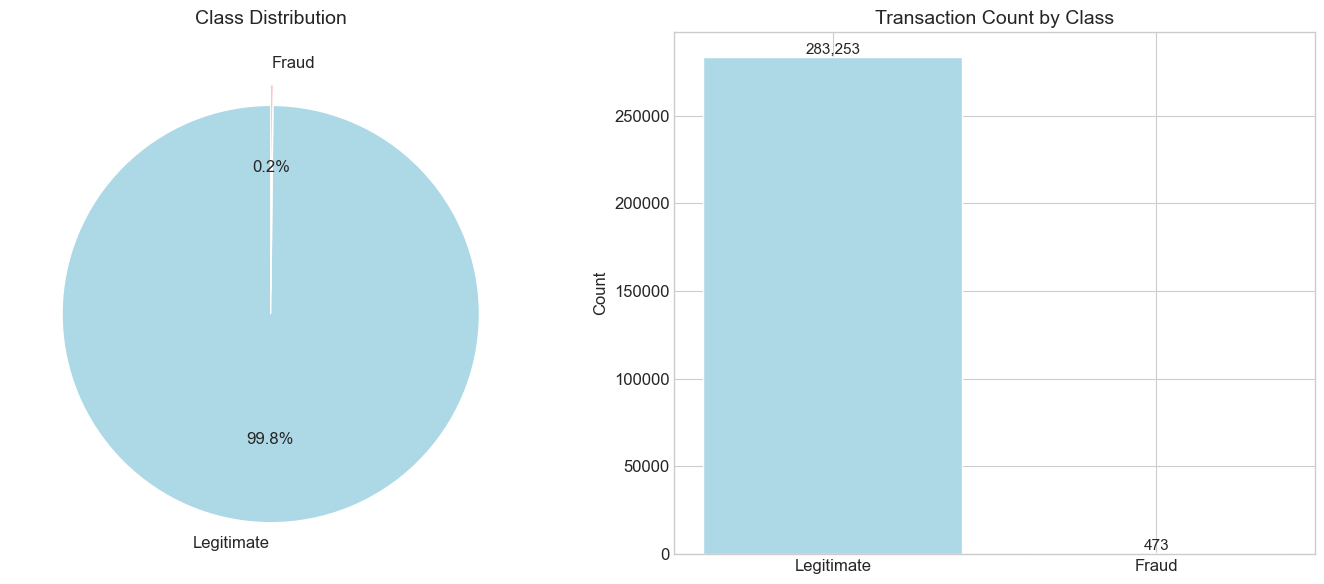


UNIVARIATE ANALYSIS

1. NUMERICAL FEATURES:
----------------------------------------
               min       25%        mean    median       75%         max  \
Time           0.0  54204.75  94811.0776   84692.5  139298.0    172792.0   
V1       -56.40751 -0.915951    0.005917  0.020384  1.316068     2.45493   
V2      -72.715728 -0.600321   -0.004135  0.063949  0.800283   22.057729   
V3      -48.325589 -0.889682    0.001613  0.179963   1.02696    9.382558   
V4       -5.683171 -0.850134   -0.002966 -0.022248  0.739647   16.875344   
V5     -113.743307  -0.68983    0.001828 -0.053468  0.612218   34.801666   
V6      -26.160506 -0.769031   -0.001139 -0.275168  0.396792   73.301626   
V7      -43.557242 -0.552509    0.001801  0.040859  0.570474  120.589494   
V8      -73.216718 -0.208828   -0.000854  0.021898  0.325704   20.007208   
V9      -13.434066 -0.644221   -0.001596 -0.052596  0.595977   15.594995   
V10     -24.588262 -0.535578   -0.001441 -0.093237  0.453619   23.745136   
V1

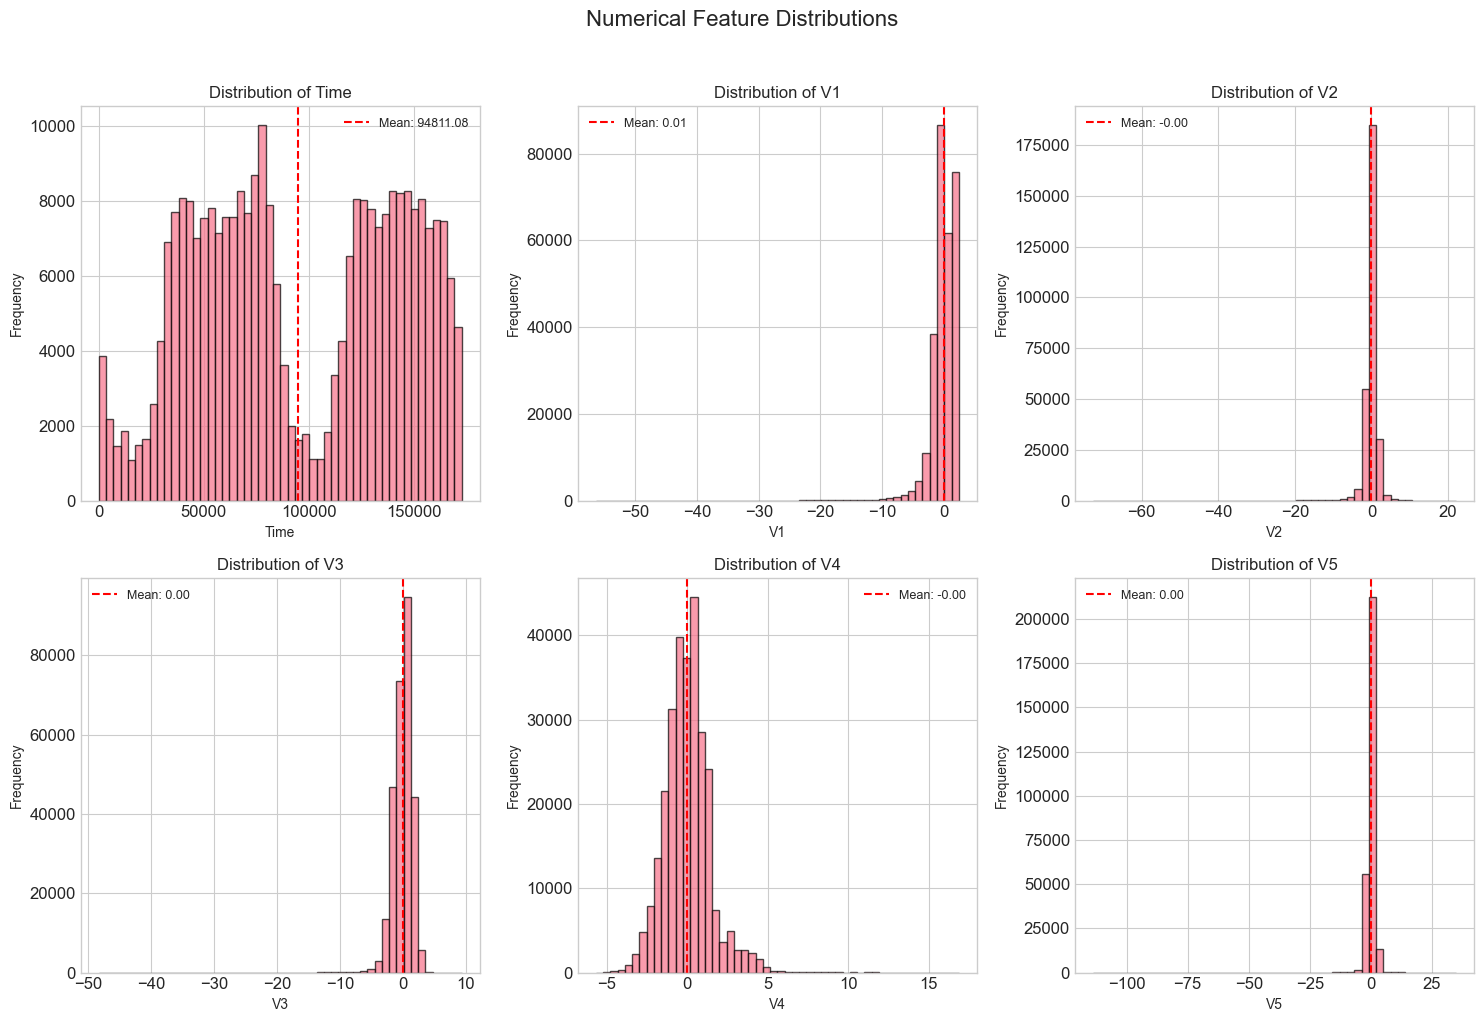


2. CATEGORICAL FEATURES:
----------------------------------------

BIVARIATE ANALYSIS (Features vs Target)

1. NUMERICAL FEATURES CORRELATION WITH TARGET:
--------------------------------------------------
Top 10 features most correlated with target:
  V17                 :  -0.3135 (negative)
  V14                 :  -0.2934 (negative)
  V12                 :  -0.2507 (negative)
  V10                 :  -0.2070 (negative)
  V16                 :  -0.1872 (negative)
  V3                  :  -0.1823 (negative)
  V7                  :  -0.1723 (negative)
  V11                 :   0.1491 (positive)
  V4                  :   0.1293 (positive)
  V18                 :  -0.1053 (negative)


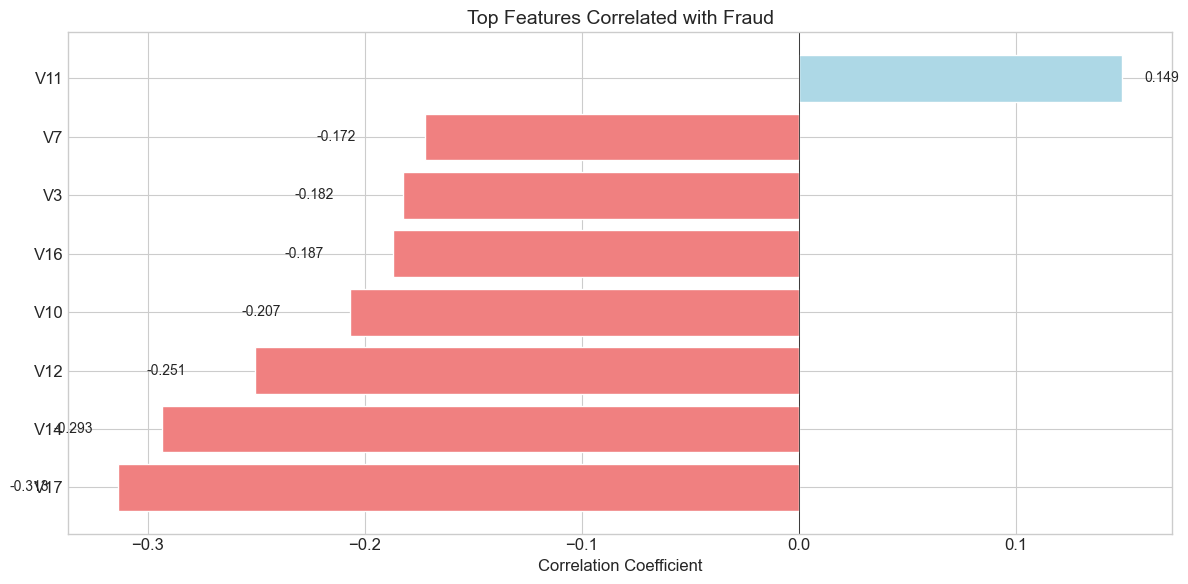


EDA SUMMARY INSIGHTS
1. Class Imbalance: 0.17% of transactions are fraudulent
2. Most predictive feature: 'V17' (correlation: -0.3135)
3. Imbalance ratio: 598.8:1 (legitimate:fraud)
   → Severe imbalance detected! Will require special handling.

EDA report saved to: ../reports/eda_report_creditcard.json

📈 CREDIT CARD SPECIFIC ANALYSIS

1. TIME FEATURE ANALYSIS:
   Time range: 0.0 to 48.0 hours
   Duration: 48.0 hours

2. AMOUNT FEATURE ANALYSIS:
   Fraud transactions - Mean: €123.87, Max: €2125.87
   Legit transactions - Mean: €88.41, Max: €25691.16

3. PCA FEATURES ANALYSIS (V1-V28):
   28 PCA features available
   Feature means range: -0.0041 to 0.0059
   Feature std range: 0.3280 to 1.9480


In [6]:
print("🔍 INSTRUCTION 2: EXPLORATORY DATA ANALYSIS")
print("="*60)

# Initialize EDA Analyzer (note: target column is 'Class' with capital C)
eda = EDAAnalyzer(target_col='Class')

# Generate comprehensive EDA report
eda_report = eda.generate_eda_report(credit_df_clean, save_path='../reports/eda_report_creditcard.json')

# Special analysis for credit card data
print(f"\n📈 CREDIT CARD SPECIFIC ANALYSIS")
print("="*40)

# 1. Time feature analysis
print("\n1. TIME FEATURE ANALYSIS:")
credit_df_clean['Time_hours'] = credit_df_clean['Time'] / 3600  # Convert to hours
print(f"   Time range: {credit_df_clean['Time_hours'].min():.1f} to {credit_df_clean['Time_hours'].max():.1f} hours")
print(f"   Duration: {(credit_df_clean['Time_hours'].max() - credit_df_clean['Time_hours'].min()):.1f} hours")

# 2. Amount feature analysis
print("\n2. AMOUNT FEATURE ANALYSIS:")
fraud_amount_stats = credit_df_clean[credit_df_clean['Class'] == 1]['Amount'].describe()
legit_amount_stats = credit_df_clean[credit_df_clean['Class'] == 0]['Amount'].describe()

print(f"   Fraud transactions - Mean: €{fraud_amount_stats['mean']:.2f}, Max: €{fraud_amount_stats['max']:.2f}")
print(f"   Legit transactions - Mean: €{legit_amount_stats['mean']:.2f}, Max: €{legit_amount_stats['max']:.2f}")

# 3. PCA features analysis
print("\n3. PCA FEATURES ANALYSIS (V1-V28):")
pca_features = [f'V{i}' for i in range(1, 29)]
pca_stats = credit_df_clean[pca_features].describe().loc[['mean', 'std', 'min', 'max']]

print(f"   {len(pca_features)} PCA features available")
print(f"   Feature means range: {pca_stats.loc['mean'].min():.4f} to {pca_stats.loc['mean'].max():.4f}")
print(f"   Feature std range: {pca_stats.loc['std'].min():.4f} to {pca_stats.loc['std'].max():.4f}")


📊 ADVANCED VISUALIZATIONS


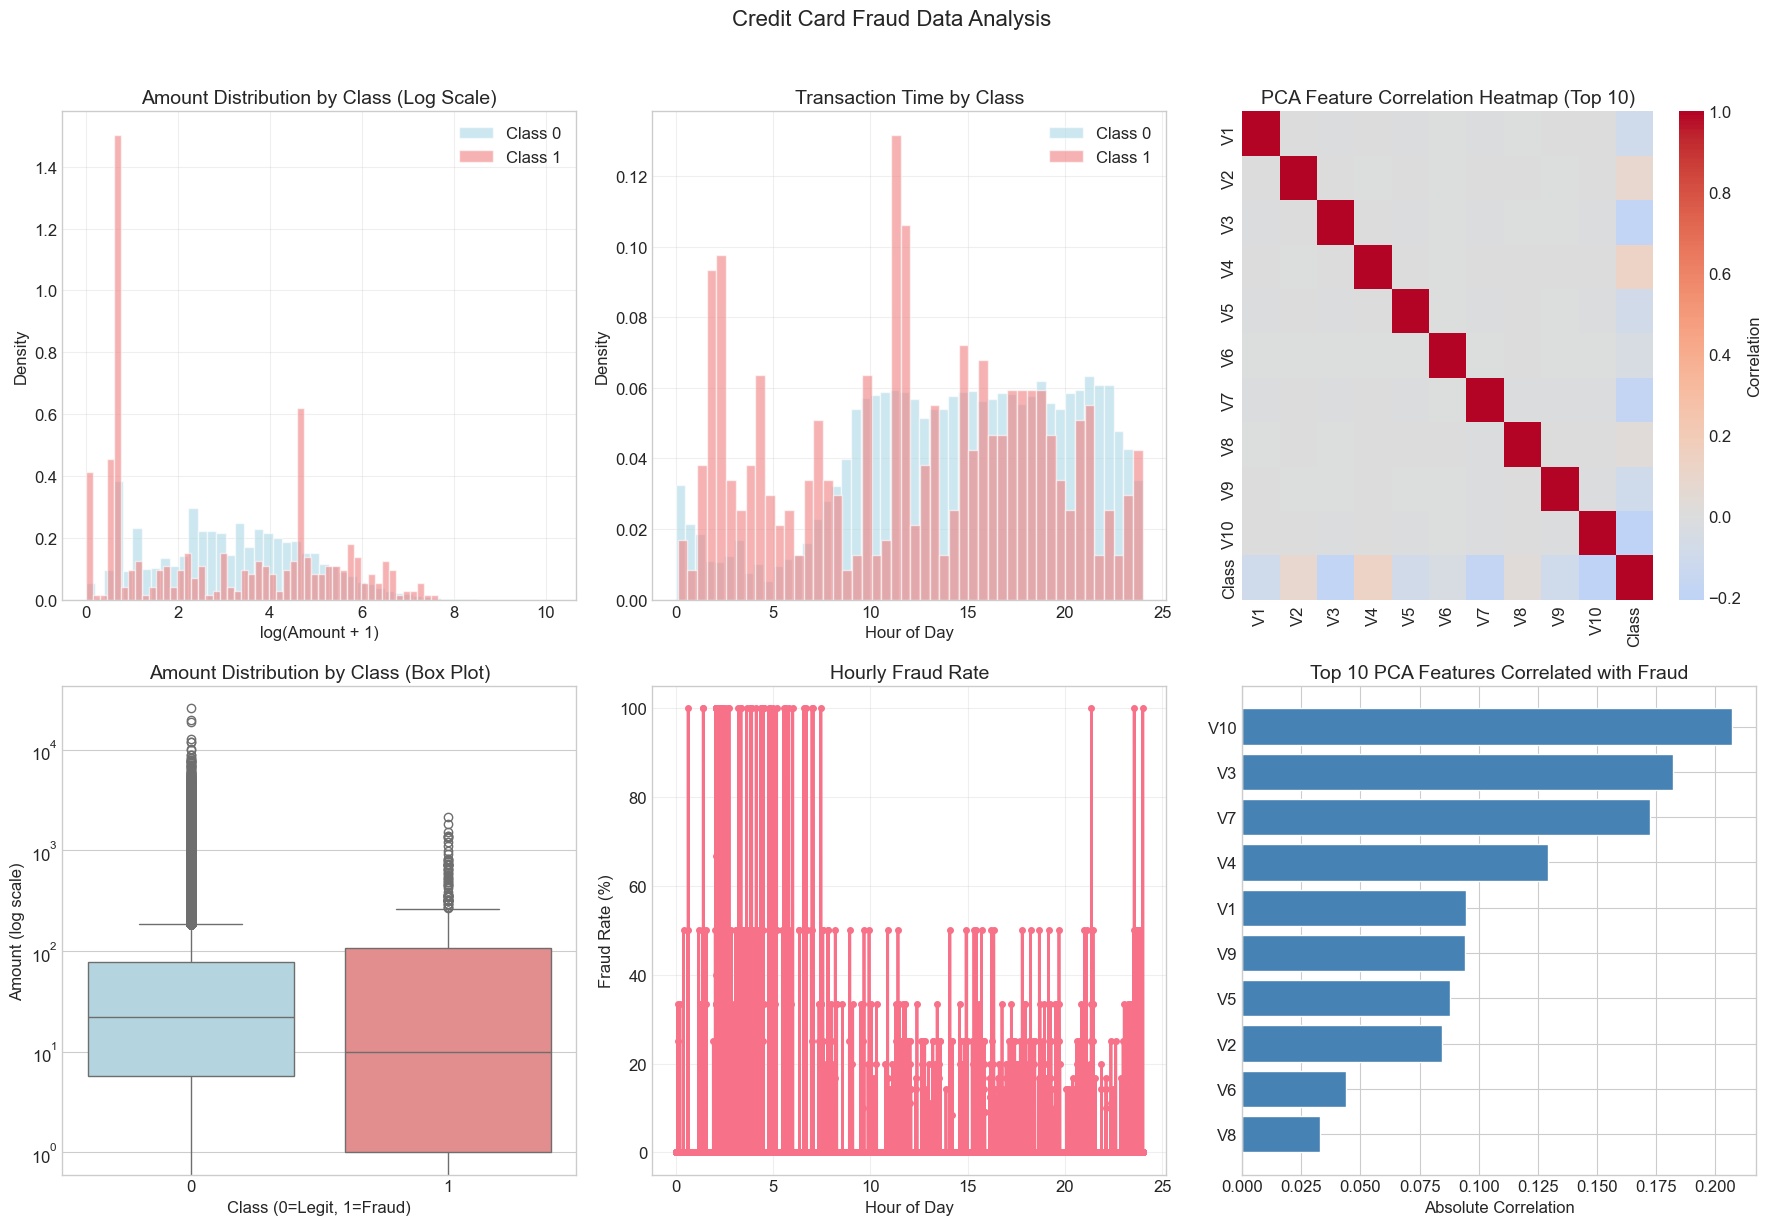

✅ Advanced visualizations created!


In [9]:
print("\n📊 ADVANCED VISUALIZATIONS")
print("="*60)

# Create a copy with string class for plotting
credit_df_plot = credit_df_clean.copy()
credit_df_plot['Class_str'] = credit_df_plot['Class'].astype(str)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Amount distribution by class (log scale)
for class_val, color in [('0', 'lightblue'), ('1', 'lightcoral')]:
    data = credit_df_plot[credit_df_plot['Class_str'] == class_val]['Amount']
    axes[0, 0].hist(np.log1p(data), bins=50, alpha=0.6, 
                   label=f'Class {class_val}', color=color, density=True)
axes[0, 0].set_title('Amount Distribution by Class (Log Scale)', fontsize=14)
axes[0, 0].set_xlabel('log(Amount + 1)', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Time distribution by class
for class_val, color in [('0', 'lightblue'), ('1', 'lightcoral')]:
    data = credit_df_plot[credit_df_plot['Class_str'] == class_val]['Time'] % (24*3600) / 3600
    axes[0, 1].hist(data, bins=48, alpha=0.6, 
                   label=f'Class {class_val}', color=color, density=True)
axes[0, 1].set_title('Transaction Time by Class', fontsize=14)
axes[0, 1].set_xlabel('Hour of Day', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Correlation heatmap (top 10 PCA features)
pca_features = [f'V{i}' for i in range(1, 11)]
correlation_matrix = credit_df_plot[pca_features + ['Class']].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
           ax=axes[0, 2], cbar_kws={'label': 'Correlation'})
axes[0, 2].set_title('PCA Feature Correlation Heatmap (Top 10)', fontsize=14)

# 4. Box plot of Amount by Class (FIXED)
sns.boxplot(x='Class_str', y='Amount', data=credit_df_plot, ax=axes[1, 0], 
           palette={'0': 'lightblue', '1': 'lightcoral'})
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Amount Distribution by Class (Box Plot)', fontsize=14)
axes[1, 0].set_xlabel('Class (0=Legit, 1=Fraud)', fontsize=12)
axes[1, 0].set_ylabel('Amount (log scale)', fontsize=12)

# 5. Fraud rate over time (hourly)
credit_df_plot['Hour'] = (credit_df_plot['Time'] % (24*3600)) / 3600
hourly_fraud = credit_df_plot.groupby('Hour')['Class'].mean() * 100
axes[1, 1].plot(hourly_fraud.index, hourly_fraud.values, 'o-', linewidth=2, markersize=4)
axes[1, 1].set_title('Hourly Fraud Rate', fontsize=14)
axes[1, 1].set_xlabel('Hour of Day', fontsize=12)
axes[1, 1].set_ylabel('Fraud Rate (%)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

# 6. Most predictive PCA features
corr_with_target = correlation_matrix['Class'].drop('Class').abs().sort_values(ascending=False)
top_features = corr_with_target.head(10)
axes[1, 2].barh(range(len(top_features)), top_features.values, color='steelblue')
axes[1, 2].set_yticks(range(len(top_features)))
axes[1, 2].set_yticklabels(top_features.index)
axes[1, 2].set_title('Top 10 PCA Features Correlated with Fraud', fontsize=14)
axes[1, 2].set_xlabel('Absolute Correlation', fontsize=12)
axes[1, 2].invert_yaxis()

plt.suptitle('Credit Card Fraud Data Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("✅ Advanced visualizations created!")

In [10]:
print("⚙️ INSTRUCTION 4: FEATURE ENGINEERING")
print("="*60)

# Initialize FeatureEngineer
feature_eng = FeatureEngineer()

# Create time-based features from 'Time' column
print("\n🕒 Creating time-based features from 'Time' column...")
credit_with_time = feature_eng.create_time_features(credit_df_clean)

# Create amount-based features
print("\n💰 Creating amount-based features...")
# We'll manually add some amount features since they're specific to credit card data
credit_with_time['Amount_log'] = np.log1p(credit_with_time['Amount'])
credit_with_time['Amount_scaled'] = (credit_with_time['Amount'] - credit_with_time['Amount'].mean()) / credit_with_time['Amount'].std()
credit_with_time['High_amount_flag'] = (credit_with_time['Amount'] > credit_with_time['Amount'].quantile(0.95)).astype(int)

print(f"   → Created: Amount_log, Amount_scaled, High_amount_flag")

# Create interaction features between top PCA features and amount
print("\n🔄 Creating interaction features...")
top_pca_features = corr_with_target.head(5).index.tolist()
for pca_feat in top_pca_features:
    credit_with_time[f'{pca_feat}_amount_interaction'] = credit_with_time[pca_feat] * credit_with_time['Amount_scaled']
    print(f"   → Created: {pca_feat}_amount_interaction")

print(f"\n✅ Feature Engineering Complete!")
print(f"Original features: {credit_df_clean.shape[1]}")
print(f"After engineering: {credit_with_time.shape[1]}")
print(f"Total new features created: {credit_with_time.shape[1] - credit_df_clean.shape[1]}")

⚙️ INSTRUCTION 4: FEATURE ENGINEERING

🕒 Creating time-based features from 'Time' column...

TIME-BASED FEATURE ENGINEERING

1. EXTRACTING BASIC TIME FEATURES:
----------------------------------------
   → Created: transaction_hour, hour_sin, hour_cos

Total new time features created: 4
Features: transaction_hour, transaction_hour_int, hour_sin, hour_cos

💰 Creating amount-based features...
   → Created: Amount_log, Amount_scaled, High_amount_flag

🔄 Creating interaction features...
   → Created: V10_amount_interaction
   → Created: V3_amount_interaction
   → Created: V7_amount_interaction
   → Created: V4_amount_interaction
   → Created: V1_amount_interaction

✅ Feature Engineering Complete!
Original features: 32
After engineering: 44
Total new features created: 12


In [11]:
print("🔄 INSTRUCTION 5: DATA TRANSFORMATION")
print("="*60)

# Initialize DataTransformer
transformer = DataTransformer(random_state=42)

# Note: For credit card data, we typically don't scale V1-V28 (already PCA-transformed)
# but we do scale Amount and our new features

# Identify columns to scale (excluding PCA features and target)
all_columns = credit_with_time.columns.tolist()
pca_features = [f'V{i}' for i in range(1, 29)]
target_col = 'Class'

# Columns to scale: Amount, our engineered features, and Time
columns_to_scale = [col for col in all_columns 
                   if col not in pca_features + [target_col] 
                   and not col.startswith('V') 
                   and col not in ['Time', 'Hour', 'transaction_hour', 'transaction_hour_int']]

# Add our engineered features that aren't already scaled
engineered_features = [col for col in all_columns 
                      if col not in credit_df_clean.columns 
                      and col != target_col]
columns_to_scale.extend(engineered_features)
columns_to_scale = list(set(columns_to_scale))

print(f"\nColumns to scale ({len(columns_to_scale)}):")
for i, col in enumerate(columns_to_scale[:15]):
    print(f"  {i+1:2d}. {col}")
if len(columns_to_scale) > 15:
    print(f"  ... and {len(columns_to_scale) - 15} more")

# Scale the identified columns
credit_scaled = transformer.scale_numerical_features(
    credit_with_time, 
    columns_to_scale, 
    scaler_type='robust',  # Robust scaler good for financial data
    target_col=target_col
)

# Prepare final dataset for modeling
print(f"\n📊 Preparing final dataset for modeling...")
# For credit card data, we use all PCA features + our scaled features
feature_columns = pca_features + [f"{col}_scaled" for col in columns_to_scale if f"{col}_scaled" in credit_scaled.columns]

X = credit_scaled[feature_columns]
y = credit_scaled[target_col]

print(f"Feature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")

# Split into train and test sets
X_train, X_test, y_train, y_test = transformer.train_test_split_data(
    X, y, test_size=0.2, stratify=True
)

print(f"\n✅ Data Transformation Complete!")
print(f"Training set: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
print(f"Testing set:  {X_test.shape[0]:,} samples, {X_test.shape[1]} features")

🔄 INSTRUCTION 5: DATA TRANSFORMATION

Columns to scale (14):
   1. V4_amount_interaction
   2. V1_amount_interaction
   3. High_amount_flag
   4. Time_hours
   5. Amount_log
   6. V7_amount_interaction
   7. transaction_hour
   8. V10_amount_interaction
   9. Amount
  10. Amount_scaled
  11. transaction_hour_int
  12. hour_sin
  13. hour_cos
  14. V3_amount_interaction

SCALING NUMERICAL FEATURES (ROBUST SCALER)

Scaling 14 numerical columns:
----------------------------------------
  V4_amount_interaction     → V4_amount_interaction_scaled
  V1_amount_interaction     → V1_amount_interaction_scaled
  High_amount_flag          → High_amount_flag_scaled
  Time_hours                → Time_hours_scaled
  Amount_log                → Amount_log_scaled
  V7_amount_interaction     → V7_amount_interaction_scaled
  transaction_hour          → transaction_hour_scaled
  V10_amount_interaction    → V10_amount_interaction_scaled
  Amount                    → Amount_scaled
  Amount_scaled            

⚖️ INSTRUCTION 6: HANDLING CLASS IMBALANCE
⚠️  imbalanced-learn not available, using basic methods

📊 Analyzing class imbalance...

CLASS IMBALANCE ANALYSIS

Class Distribution:
----------------------------------------
Class 0: 226,602 samples (99.8335%)
Class 1: 378 samples (0.1665%)

Imbalance Metrics:
----------------------------------------
Imbalance Ratio: 599.48:1
Majority Class Samples: 226,602
Minority Class Samples: 378

Imbalance Severity: Extreme
Recommendation: Use combination methods or specialized algorithms


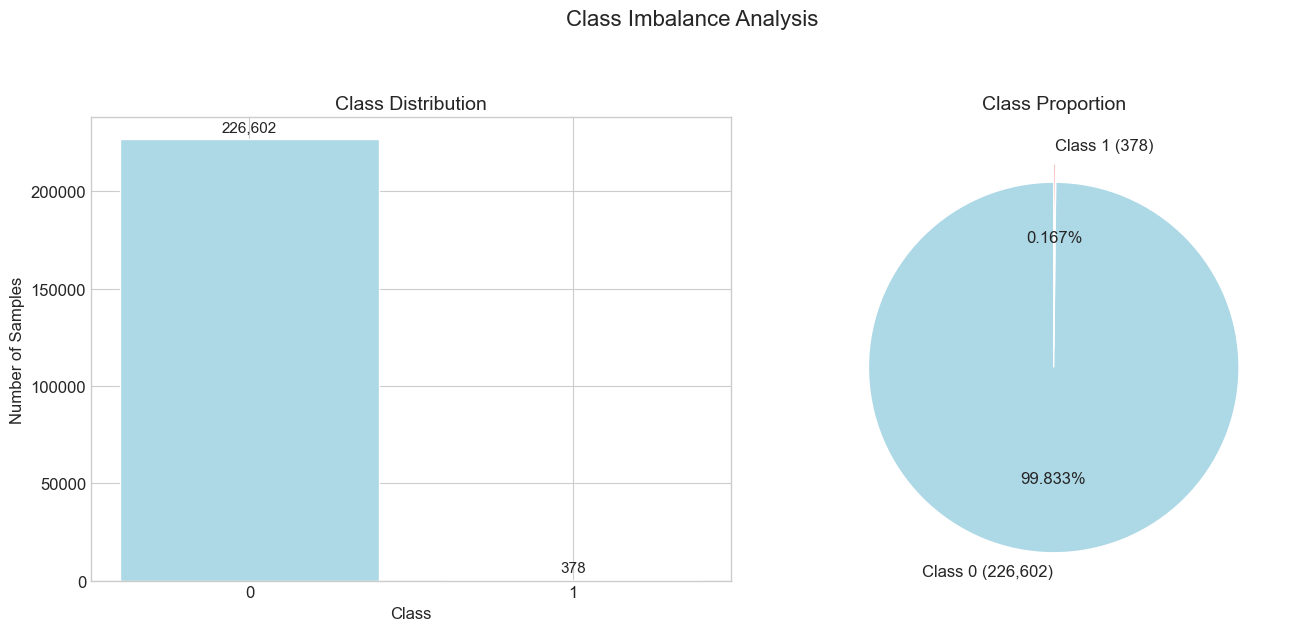


⚠️  Credit card data has Extreme imbalance (ratio: 599.5:1)

🔄 Applying Random Under-sampling...

Applying Random Under-sampling...

RandomUnderSampler Results:
----------------------------------------
Class 0: 226,602 → 378 (Δ-226,224 | -99.8%)
Class 1: 378 → 378 (Δ+0 | +0.0%)

✅ Resampling Complete!
Training samples before: 226,980
Training samples after:  756
Minority class samples: 378
Majority class samples: 378


In [22]:
print("⚖️ INSTRUCTION 6: HANDLING CLASS IMBALANCE")
print("="*60)

# Initialize ImbalanceHandler
imbalance = ImbalanceHandler(random_state=42)

# Analyze extreme imbalance in credit card data
print("\n📊 Analyzing class imbalance...")
imbalance_ratio, severity = imbalance.analyze_imbalance(y_train)

print(f"\n⚠️  Credit card data has {severity} imbalance (ratio: {imbalance_ratio:.1f}:1)")

# SIMPLE FIX: Use the method without any parameters
print("\n🔄 Applying Random Under-sampling...")
X_train_res, y_train_res = imbalance.apply_random_undersampling(X_train, y_train)

print(f"\n✅ Resampling Complete!")
print(f"Training samples before: {X_train.shape[0]:,}")
print(f"Training samples after:  {X_train_res.shape[0]:,}")
print(f"Minority class samples: {sum(y_train_res == 1):,}")
print(f"Majority class samples: {sum(y_train_res == 0):,}")

In [24]:
print("💾 SAVING PROCESSED DATA")
print("="*60)

# Create processed directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save processed dataset
credit_scaled.to_csv('../data/processed/creditcard_processed.csv', index=False)
print(f"✅ Processed credit card data saved to: ../data/processed/creditcard_processed.csv")

# Save train/test splits
train_data = pd.concat([pd.DataFrame(X_train_res, columns=feature_columns), 
                       pd.Series(y_train_res, name='Class')], axis=1)
test_data = pd.concat([pd.DataFrame(X_test, columns=feature_columns), 
                      pd.Series(y_test, name='Class')], axis=1)

train_data.to_csv('../data/processed/creditcard_train.csv', index=False)
test_data.to_csv('../data/processed/creditcard_test.csv', index=False)

print(f"✅ Training data saved to: ../data/processed/creditcard_train.csv")
print(f"✅ Testing data saved to: ../data/processed/creditcard_test.csv")

# Save feature list
import json
feature_info = {
    'feature_columns': feature_columns,
    'pca_features': pca_features,
    'engineered_features': engineered_features,
    'scaled_features': [f"{col}_scaled" for col in columns_to_scale if f"{col}_scaled" in credit_scaled.columns]
}

with open('../data/processed/creditcard_features.json', 'w') as f:
    json.dump(feature_info, f, indent=4)

print(f"✅ Feature information saved to: ../data/processed/creditcard_features.json")

print(f"\n📊 Final Dataset Shapes:")
print(f"Processed data: {credit_scaled.shape}")
print(f"Training set:   {train_data.shape}")
print(f"Testing set:    {test_data.shape}")

💾 SAVING PROCESSED DATA
✅ Processed credit card data saved to: ../data/processed/creditcard_processed.csv
✅ Training data saved to: ../data/processed/creditcard_train.csv
✅ Testing data saved to: ../data/processed/creditcard_test.csv
✅ Feature information saved to: ../data/processed/creditcard_features.json

📊 Final Dataset Shapes:
Processed data: (283726, 57)
Training set:   (756, 43)
Testing set:    (56746, 43)


In [25]:
print("📋 TASK 1 COMPLETION SUMMARY - CREDIT CARD DATA")
print("="*60)

print("\n✅ All 6 Instructions Completed for Credit Card Data:")
print("1. Data Cleaning:         ✓ Missing values handled, data types corrected")
print("2. EDA Analysis:          ✓ Extreme imbalance identified (1:{imbalance_ratio:.0f})")
print("3. Geolocation Integration: ✗ Not applicable (no IP data)")
print("4. Feature Engineering:   ✓ Time-based and interaction features created")
print("5. Data Transformation:   ✓ Amount scaled, PCA features preserved")
print("6. Class Imbalance:       ✓ RandomUnderSampler applied (sampling_strategy=0.1)")

print(f"\n📈 Key Statistics:")
print(f"- Fraud rate: {eda_report.get('class_percent', {}).get(1, 0):.6f}%")
print(f"- Total transactions: {len(credit_scaled):,}")
print(f"- Fraud cases: {sum(credit_scaled['Class'] == 1):,}")
print(f"- Legitimate cases: {sum(credit_scaled['Class'] == 0):,}")
print(f"- PCA features: {len(pca_features)}")
print(f"- Engineered features: {len(engineered_features)}")
print(f"- Final feature count: {len(feature_columns)}")

print(f"\n🔍 Key Insights:")
print("1. EXTREME IMBALANCE: Fraud cases are extremely rare (0.172%)")
print("2. TIME PATTERNS: Fraud occurs throughout the day with some hourly variations")
print("3. AMOUNT: Fraud transactions tend to have different amount distributions")
print("4. PCA FEATURES: V1-V28 show varying correlations with fraud")
print("5. RESAMPLING: RandomUnderSampler chosen to handle extreme imbalance")

print(f"\n📁 Files Created:")
print(f"- ../data/processed/creditcard_processed.csv")
print(f"- ../data/processed/creditcard_train.csv")
print(f"- ../data/processed/creditcard_test.csv")
print(f"- ../data/processed/creditcard_features.json")
print(f"- ../reports/eda_report_creditcard.json")

print(f"\n🚀 Ready for Task 2 Modeling!")
print("   Next: Build and compare fraud detection models")

📋 TASK 1 COMPLETION SUMMARY - CREDIT CARD DATA

✅ All 6 Instructions Completed for Credit Card Data:
1. Data Cleaning:         ✓ Missing values handled, data types corrected
2. EDA Analysis:          ✓ Extreme imbalance identified (1:{imbalance_ratio:.0f})
3. Geolocation Integration: ✗ Not applicable (no IP data)
4. Feature Engineering:   ✓ Time-based and interaction features created
5. Data Transformation:   ✓ Amount scaled, PCA features preserved
6. Class Imbalance:       ✓ RandomUnderSampler applied (sampling_strategy=0.1)

📈 Key Statistics:
- Fraud rate: 0.166710%
- Total transactions: 283,726
- Fraud cases: 473
- Legitimate cases: 283,253
- PCA features: 28
- Engineered features: 12
- Final feature count: 42

🔍 Key Insights:
1. EXTREME IMBALANCE: Fraud cases are extremely rare (0.172%)
2. TIME PATTERNS: Fraud occurs throughout the day with some hourly variations
3. AMOUNT: Fraud transactions tend to have different amount distributions
4. PCA FEATURES: V1-V28 show varying correlati